## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

## Setting up Data

URL for data: https://drive.google.com/file/d/1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb/view

In [2]:
data_dir = "cell_images/"

In [3]:
os.listdir(data_dir)

['test', 'train']

## Reading the Data

In [4]:
test_path = data_dir+"/test"
train_path = data_dir+"/train"

In [5]:
test_path

'cell_images//test'

In [6]:
train_path

'cell_images//train'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

### Checking Parasitized Cell

In [9]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
parasitized_cell = train_path+'/parasitized/'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

imread(parasitized_cell).shape

(148, 142, 3)

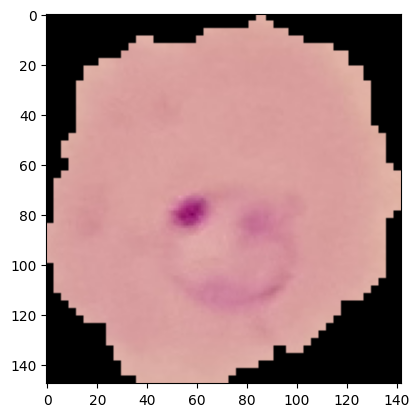

In [11]:
parasitized_cell_image = imread(parasitized_cell)
plt.imshow(parasitized_cell_image)

### Checking Uninfected Cell

In [12]:
os.listdir(train_path+'/uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
uninfected_cell = train_path+'/uninfected/'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

imread(uninfected_cell).shape

(139, 160, 3)

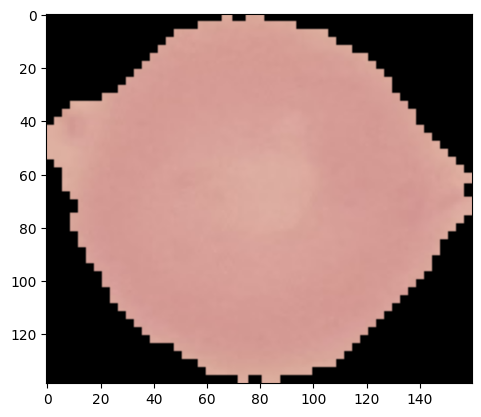

In [14]:
uninfected_cell_image = imread(uninfected_cell)
plt.imshow(uninfected_cell_image)

### Checking Number of Images

In [15]:
len(os.listdir(train_path+'/parasitized'))

12480

In [16]:
len(os.listdir(train_path+'/uninfected'))

12480

In [17]:
len(os.listdir(test_path+'/parasitized'))

1300

In [18]:
len(os.listdir(test_path+'/uninfected'))

1300

### Dimensions and Shape of Images

In [19]:
dimensions_list1 = []
dimensions_list2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    image_file = imread(test_path+'/uninfected/'+image_filename)
    dimension1, dimension2, colors = image_file.shape
    dimensions_list1.append(dimension1)
    dimensions_list2.append(dimension2)

In [20]:
dimensions_list1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [21]:
dimensions_list2

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


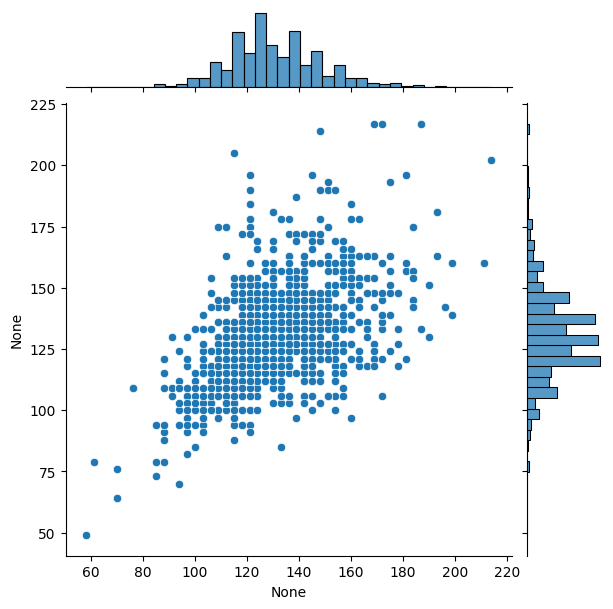

In [22]:
sns.jointplot(x=dimensions_list1, y=dimensions_list2);

### Scaling Images to Same Size

In [23]:
np.mean(dimensions_list1)

130.92538461538462

In [24]:
np.mean(dimensions_list2)

130.75

In [25]:
image_shape = (130, 130, 3)

## Data Processing

### Image Generator

In [26]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

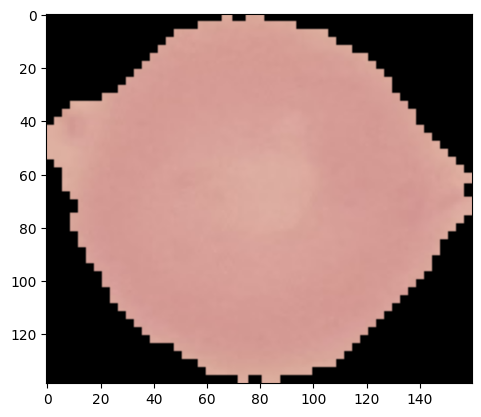

In [27]:
plt.imshow(uninfected_cell_image)

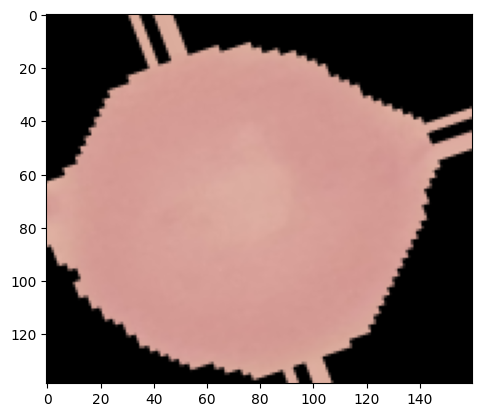

In [28]:
plt.imshow(image_generator.random_transform(uninfected_cell_image))

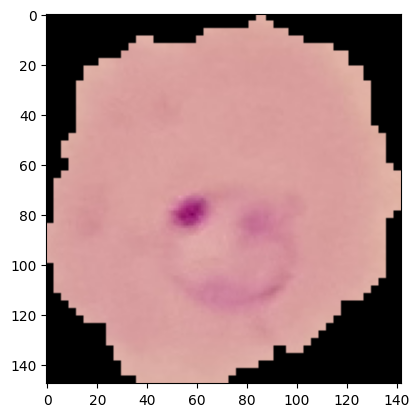

In [29]:
plt.imshow(parasitized_cell_image)

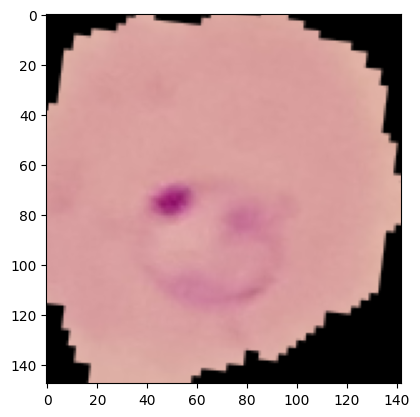

In [30]:
plt.imshow(image_generator.random_transform(parasitized_cell_image))

### Setting up Directories

In [31]:
train_path

'cell_images//train'

In [32]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating Model

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [36]:
early_stopping = EarlyStopping(monitor="val_loss",patience=1)

In [37]:
batch_size = 16

In [38]:
train_image_generator = image_generator.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary'
)

Found 24958 images belonging to 2 classes.


In [39]:
test_image_generator = image_generator.flow_from_directory(
    directory=test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2600 images belonging to 2 classes.


In [40]:
train_image_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [41]:
test_image_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [42]:
model.fit(
    train_image_generator,
    epochs=20,
    validation_data=test_image_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.5286 - loss: 1.9250 - val_accuracy: 0.5631 - val_loss: 0.6790
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.5732 - loss: 0.6792 - val_accuracy: 0.5904 - val_loss: 0.6736
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.5810 - loss: 0.6787 - val_accuracy: 0.5792 - val_loss: 0.6743


## Evaluating the Model

In [43]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.547921,0.887960,0.563077,0.679049
1,0.576128,0.677698,0.590385,0.673579
2,0.589270,0.673816,0.579231,0.674280


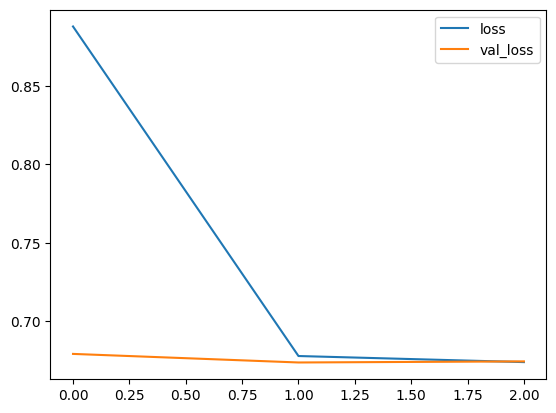

In [44]:
metrics[['loss', 'val_loss']].plot();

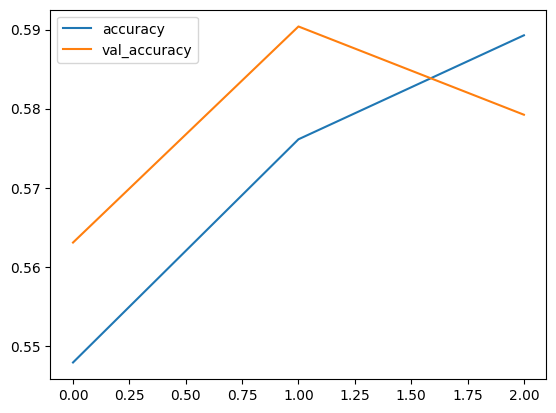

In [45]:
metrics[['accuracy', 'val_accuracy']].plot();

In [46]:
model.metrics_names

['loss', 'compile_metrics']

In [47]:
model.evaluate(test_image_generator)

163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4352 - loss: 0.7471


[0.6769083738327026, 0.5638461709022522]

## Saving the Model

In [48]:
model.save('cell_images_classification_model.keras')

## Loading the Model

In [49]:
model = load_model('cell_images_classification_model.keras')

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,986,629 (19.02 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,324,420 (12.68 MB)

## Prediction

In [51]:
prediction = model.predict(test_image_generator)

163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


In [52]:
predictions = prediction > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [53]:
print(classification_report(y_true=test_image_generator.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.64      0.38      0.47      1300
           1       0.56      0.78      0.65      1300

    accuracy                           0.58      2600
   macro avg       0.60      0.58      0.56      2600
weighted avg       0.60      0.58      0.56      2600



<Axes: >

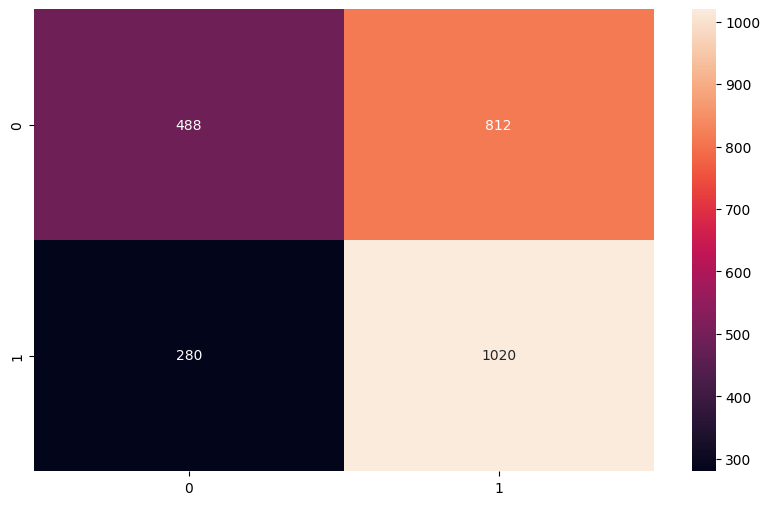

In [54]:
plt.figure(figsize=(10,6))
matrix = confusion_matrix(y_true=test_image_generator.classes, y_pred=predictions)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Prediction on Single Image

In [55]:
parasitized_cell

'cell_images//train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

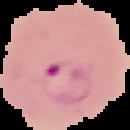

In [56]:
my_image = image.load_img(parasitized_cell, target_size=image_shape)
my_image

In [57]:
my_image_array = image.img_to_array(my_image)
my_image_array.shape

(130, 130, 3)

In [58]:
my_image_array = np.expand_dims(my_image_array, axis=0)
my_image_array.shape

(1, 130, 130, 3)

In [59]:
single_image_prediction = model.predict(my_image_array)
single_image_prediction = (single_image_prediction > 0.5).astype(int)
single_image_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[1]])

In [60]:
train_image_generator.class_indices

{'parasitized': 0, 'uninfected': 1}